In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df['Species'] = le.fit_transform(df['Species'])

In [6]:
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,0,24.0,26.3,31.2,12.4800,4.3056,290.0
2,0,23.9,26.5,31.1,12.3778,4.6961,340.0
3,0,26.3,29.0,33.5,12.7300,4.4555,363.0
4,0,26.5,29.0,34.0,12.4440,5.1340,430.0


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= .2,random_state= 42)

In [9]:
from sklearn.cluster import KMeans

C:\Users\chiwa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


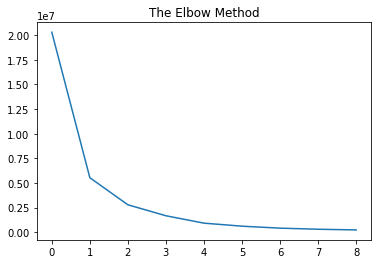

In [23]:
arr = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state =42)
    kmeans.fit(X)
    arr.append(kmeans.inertia_)
    
plt.plot(arr)
plt.title('The Elbow Method')
plt.show()

In [20]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)
kmeans.fit(df)
kmeans.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [21]:
df['cluster'] = kmeans.labels_
print(df)

     Species  Length1  Length2  Length3   Height   Width  Weight  cluster
0          0     23.2     25.4     30.0  11.5200  4.0200   242.0        1
1          0     24.0     26.3     31.2  12.4800  4.3056   290.0        1
2          0     23.9     26.5     31.1  12.3778  4.6961   340.0        1
3          0     26.3     29.0     33.5  12.7300  4.4555   363.0        1
4          0     26.5     29.0     34.0  12.4440  5.1340   430.0        2
..       ...      ...      ...      ...      ...     ...     ...      ...
154        5     11.5     12.2     13.4   2.0904  1.3936    12.2        1
155        5     11.7     12.4     13.5   2.4300  1.2690    13.4        1
156        5     12.1     13.0     13.8   2.2770  1.2558    12.2        1
157        5     13.2     14.3     15.2   2.8728  2.0672    19.7        1
158        5     13.8     15.0     16.2   2.9322  1.8792    19.9        1

[159 rows x 8 columns]
